Exploring Data for HDB Resale Flats.

Data sourced from data.gov.sg

In [2]:
#imports
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
#define relative file paths
raw_dir = "/data/raw"
processed_dir = "/data/processed"
print(os.getcwd()+raw_dir)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

/Users/g/Dropbox/DS_Notebooks/Exploring Resale Flat/data/raw/data/raw
['resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv', 'resale-flat-prices-based-on-approval-date-1990-1999.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv']


In [2]:
# import urllib
# url = 'https://data.gov.sg/api/action/datastore_search?resource_id=1b702208-44bf-4829-b620-4615ee19b57c&limit=5'
# fileobj = urllib.urlopen(url)
# print fileobj.read()

In [20]:
#import data from csv == try to automate using API later

combined=pd.DataFrame()

for i in all_filenames:
    data= pd.read_csv(i)
    #print(data.head())
    combined=pd.concat([combined, data],ignore_index=True)

combined.head()
print("combined data has "+ str(combined.shape[0]) + " rows and " + str(combined.shape[1]) + " columns")
print(combined.columns)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN


combined data has 812704 rows and 11 columns
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')


in file 3 to 5, remaining lease column is missing, create this column

In [28]:
print("Check which columns have missing values: ")
combined.isnull().sum()

Check which columns have missing values: 


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709054
dtype: int64

In [4]:
#check the data types
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812704 entries, 0 to 812703
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                812704 non-null  object 
 1   town                 812704 non-null  object 
 2   flat_type            812704 non-null  object 
 3   block                812704 non-null  object 
 4   street_name          812704 non-null  object 
 5   storey_range         812704 non-null  object 
 6   floor_area_sqm       812704 non-null  float64
 7   flat_model           812704 non-null  object 
 8   lease_commence_date  812704 non-null  int64  
 9   remaining_lease      103650 non-null  object 
 10  resale_price         812704 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 68.2+ MB


#### Data Type Conversion 

convert the date values by reading the data again

convert text to categories

In [31]:
#load data
# headers = ['col1', 'col2', 'col3', 'col4']
# dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'float'}

# pd.read_csv(file, sep='\t', header=None, names=headers, dtype=dtypes, parse_dates=col_dates)
col_dates = ['month', 'lease_commence_date']
col_cat =['town','flat_type','block','street_name','storey_range','flat_model']


combined=pd.DataFrame()
for i in all_filenames:
    data= pd.read_csv(i,parse_dates=col_dates)
    data[col_cat]= data[col_cat].astype('category')
    #print(data.head())
    combined=pd.concat([combined, data],ignore_index=True)
combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812704 entries, 0 to 812703
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                812704 non-null  datetime64[ns]
 1   town                 812704 non-null  object        
 2   flat_type            812704 non-null  object        
 3   block                812704 non-null  object        
 4   street_name          812704 non-null  object        
 5   storey_range         812704 non-null  object        
 6   floor_area_sqm       812704 non-null  float64       
 7   flat_model           812704 non-null  object        
 8   lease_commence_date  812704 non-null  datetime64[ns]
 9   resale_price         812704 non-null  float64       
 10  remaining_lease      103650 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 68.2+ MB


Data Cleaning required:

Recalculate remaining lease so that its a numeric value

Convert variable to categories

In [42]:
combined.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,years_remaining,months_remaining,year_sold
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,NaN,26,313,2012
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,NaN,32,385,2012
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,NaN,32,385,2012
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,NaN,28,337,2012
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,NaN,32,385,2012


Add feature 
> Number of years remaining
> Number of months remaining

Drop the original column - remaining lease ,as it was in text form

Add feature - Year the flat was sold

In [43]:
combined['years_remaining'] = combined['month'].dt.year - combined['lease_commence_date'].dt.year
combined['months_remaining'] = ((combined['month'] - combined['lease_commence_date'])/np.timedelta64(1, 'M')).astype(int)
combined['year_sold'] = combined['month'].dt.year
combined.drop('remaining_lease', axis=1, inplace=True)

combined.head()
#resale2017['years_remaining'] = resale2017['month'].dt.year - resale2017['lease_commence_date'].dt.year
#resale2017.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,months_remaining,year_sold
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,26,313,2012
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,32,385,2012
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,32,385,2012
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,28,337,2012
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,32,385,2012


Check for missing values



In [44]:
combined.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
years_remaining        0
months_remaining       0
year_sold              0
dtype: int64

No Missing Values 

In [45]:
combined.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,months_remaining,year_sold
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,26,313,2012
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,32,385,2012
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,32,385,2012
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,28,337,2012
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,32,385,2012


Categorize the storey range into low, mid, high

In [46]:
#combined.groupby(['town','storey_range']).count()
combined['storey_range'].value_counts().sort_values()


31 TO 35         2
36 TO 40         7
49 TO 51         8
43 TO 45        14
46 TO 48        19
26 TO 30        39
21 TO 25        92
40 TO 42       114
37 TO 39       235
31 TO 33       241
34 TO 36       248
16 TO 20       265
28 TO 30       990
11 TO 15      1259
25 TO 27      2424
06 TO 10      2474
01 TO 05      2700
22 TO 24      5879
19 TO 21      9167
16 TO 18     18813
13 TO 15     50854
10 TO 12    157733
01 TO 03    166380
07 TO 09    186340
04 TO 06    206407
Name: storey_range, dtype: int64

In [48]:
combined['storey_start'] = combined['storey_range'].str[0:2].astype(int)
combined['storey_end']   = combined['storey_range'].str[-2:].astype(int)
#combined['storey_cat']   = 
combined.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,months_remaining,year_sold,storey_start,storey_end
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,26,313,2012,6,10
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,32,385,2012,1,5
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,32,385,2012,6,10
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,28,337,2012,1,5
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,32,385,2012,6,10


In [49]:
highest_floor_of_town = pd.DataFrame(combined.groupby('town')['storey_start'].max().astype(int)/3*2)
highest_floor_of_town.columns=['high_floor_cap']
mid_floor_of_town = round(highest_floor_of_town/2,0)

low_floor_of_town = pd.DataFrame(round(highest_floor_of_town/3,0))
low_floor_of_town.columns=['low_floor_cap']
#highest_floor_of_town
#mid_floor_of_town
#calculate the high, mid and low floors of each town to categorise
#highest_floor_of_town.head()
#dict = {}

#add back the calculated values to the dataset
combined1 = pd.merge(left=combined, right=highest_floor_of_town, how='left',on='town')
#combined1.head()
combined2 = pd.merge(left=combined1, right=low_floor_of_town, how='left',on='town')
combined2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,months_remaining,year_sold,storey_start,storey_end,high_floor_cap,low_floor_cap
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,26,313,2012,6,10,18.666667,6.0
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,32,385,2012,1,5,18.666667,6.0
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,32,385,2012,6,10,18.666667,6.0
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,28,337,2012,1,5,18.666667,6.0
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,32,385,2012,6,10,18.666667,6.0


In [50]:
print(combined2.iloc[1,-1])
print(combined2.iloc[1,-2])

6.0
18.666666666666668


In [51]:
test_rows = combined2[0:10].copy()
test_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,months_remaining,year_sold,storey_start,storey_end,high_floor_cap,low_floor_cap
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,26,313,2012,6,10,18.666667,6.0
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,32,385,2012,1,5,18.666667,6.0
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,32,385,2012,6,10,18.666667,6.0
3,2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984-01-01,320000.0,28,337,2012,1,5,18.666667,6.0
4,2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980-01-01,321000.0,32,385,2012,6,10,18.666667,6.0
5,2012-03-01,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981-01-01,321000.0,31,373,2012,1,5,18.666667,6.0
6,2012-03-01,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978-01-01,323000.0,34,409,2012,1,5,18.666667,6.0
7,2012-03-01,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979-01-01,325000.0,33,397,2012,1,5,18.666667,6.0
8,2012-03-01,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979-01-01,328000.0,33,397,2012,11,15,18.666667,6.0
9,2012-03-01,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985-01-01,330000.0,27,325,2012,1,5,18.666667,6.0


In [52]:
#subset_storey = combined2[['storey_start', 'high_floor_cap','low_floor_cap']]

def classify_floor(x):
    #print (x)
    current = x['storey_start']
    cap = x['high_floor_cap']
    low = x['low_floor_cap']
    #print(cap)
    #print(low)
    #print (cap)
    if current > cap:
        return "high"
    elif current < low:
        return "low"
    else:
        return "mid"

# test_class = subset_storey.apply(classify_floor, axis=1)
# test_class.head()

test_class = test_rows.apply(classify_floor, axis=1)
test_rows['cat_floor'] = test_rows.apply(classify_floor, axis=1)
#test_rows

%timeit combined2['cat_floor'] = combined2.apply(classify_floor, axis=1)
combined2['cat_floor'] = combined2.apply(classify_floor, axis=1)

print(combined2['cat_floor'].value_counts())


54.7 s ± 1.08 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
mid     440081
low     350636
high     21987
Name: cat_floor, dtype: int64


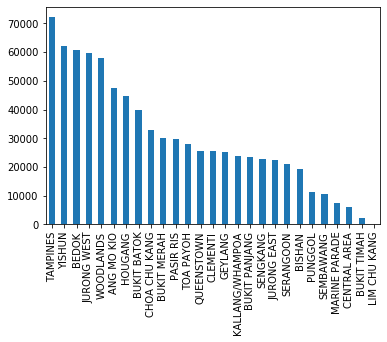

In [70]:

combined2['town'].value_counts().plot(kind='bar')

In [54]:
combined2['cat_floor'].value_counts()

mid     440081
low     350636
high     21987
Name: cat_floor, dtype: int64

In [ ]:
#combined['town'].value_counts().plot(kind='bar')

In [ ]:
#combined['flat_type'].value_counts().plot(kind='bar')

In [67]:
file_out = "/combined_clean_data.csv"

print(os.getcwd()+processed_dir+file_out)
combined2.to_csv("/Users/g/Dropbox/DS_Notebooks/Exploring Resale Flat/data/processed/combined_clean_data.csv",index=False)


/Users/g/Dropbox/DS_Notebooks/Exploring Resale Flat/data/raw/data/processed/combined_clean_data.csv
